In [1]:
!pip install sortedcontainers
!pip install fastplotlib
!pip install PySide6
!pip install wgpu
!pip install cmasher

     -------------------------------------- 367.1/367.1 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 40.9/40.9 kB ? eta 0:00:00


In [4]:
%run main.py

Found 9 avi files: [WindowsPath('F:/ROlga/Rudy_old-young-11-2022_03-2023/group1/test/M1/2023_03_16/12_16_51/Miniscope/0.avi'), WindowsPath('F:/ROlga/Rudy_old-young-11-2022_03-2023/group1/test/M1/2023_03_16/12_16_51/Miniscope/1.avi'), WindowsPath('F:/ROlga/Rudy_old-young-11-2022_03-2023/group1/test/M1/2023_03_16/12_16_51/Miniscope/2.avi'), WindowsPath('F:/ROlga/Rudy_old-young-11-2022_03-2023/group1/test/M1/2023_03_16/12_16_51/Miniscope/3.avi'), WindowsPath('F:/ROlga/Rudy_old-young-11-2022_03-2023/group1/test/M1/2023_03_16/12_16_51/Miniscope/4.avi'), WindowsPath('F:/ROlga/Rudy_old-young-11-2022_03-2023/group1/test/M1/2023_03_16/12_16_51/Miniscope/5.avi'), WindowsPath('F:/ROlga/Rudy_old-young-11-2022_03-2023/group1/test/M1/2023_03_16/12_16_51/Miniscope/6.avi'), WindowsPath('F:/ROlga/Rudy_old-young-11-2022_03-2023/group1/test/M1/2023_03_16/12_16_51/Miniscope/7.avi'), WindowsPath('F:/ROlga/Rudy_old-young-11-2022_03-2023/group1/test/M1/2023_03_16/12_16_51/Miniscope/8.avi')]
Data shape: (8934

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

Draw error
Traceback (most recent call last):
  File "C:\Users\1\AppData\Roaming\Python\Python310\site-packages\wgpu\gui\base.py", line 23, in log_exception
    yield
  File "C:\Users\1\AppData\Roaming\Python\Python310\site-packages\wgpu\gui\base.py", line 172, in _draw_frame_and_present
    self.draw_frame()
  File "C:\Users\1\AppData\Roaming\Python\Python310\site-packages\fastplotlib\plot.py", line 87, in render
    super(Plot, self).render()
  File "C:\Users\1\AppData\Roaming\Python\Python310\site-packages\fastplotlib\layouts\_subplot.py", line 154, in render
    super(Subplot, self).render()
  File "C:\Users\1\AppData\Roaming\Python\Python310\site-packages\fastplotlib\layouts\_base.py", line 118, in render
    self.viewport.render(self.scene, self.camera)
  File "C:\Users\1\AppData\Roaming\Python\Python310\site-packages\pygfx\utils\viewport.py", line 68, in render
    self.renderer.render(scene, camera, rect=self.rect, flush=False)
  File "C:\Users\1\AppData\Roaming\Python\Python31

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

with open("data/sample_CAIMAN_output.pickle","rb") as f:
    data = pickle.load(f)

In [75]:
data.YrA.shape

(130, 11917)

In [87]:
data.A.sum(axis=1).rehs

(237350, 1)

In [7]:
from skimage.measure import find_contours

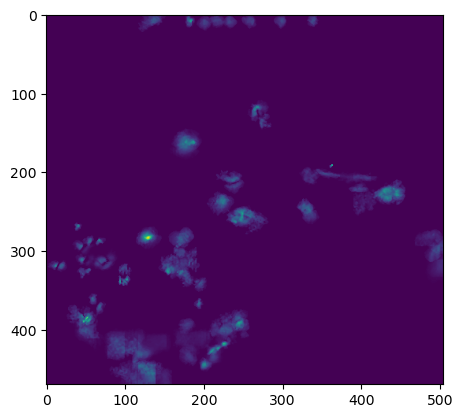

In [97]:
plt.imshow(np.reshape(data.A.sum(axis=1), data.dims, order='F'))

In [67]:
component_matrix = np.reshape(data.A[:,3].toarray(), data.dims, order='F')
contour = np.array(find_contours(component_matrix>0, 0)[0])

(0.0, 20.0)

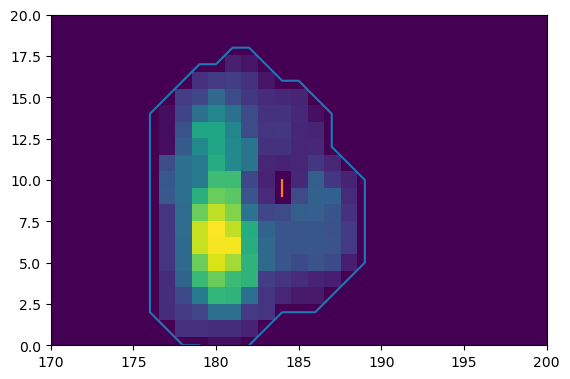

In [66]:
plt.imshow(component_matrix)
for s in contour:
    plt.plot(s[:,1],s[:,0])
plt.xlim(170,200)
plt.ylim(0,20)

In [17]:
contour = np.array(find_contours(component_matrix>0))[0,:,:]

In [110]:
np.append(np.array([1,2]),0)

array([1, 2, 0])

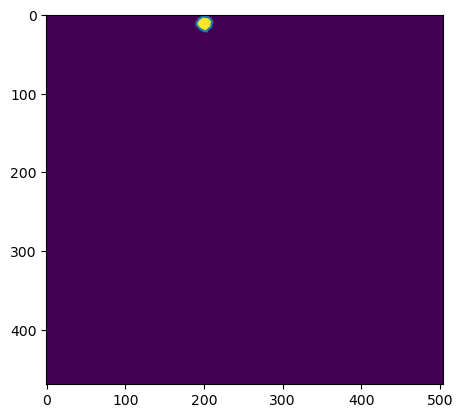

In [19]:
plt.imshow(component_matrix>0)
plt.plot(contour[:,1],contour[:,0])

In [57]:
with open("CNMF_A_and_C_sample.pickle", "wb") as f:
    pickle.dump({"A":data.A,"C":data.C,"dims":data.dims}, f)

In [5]:
from moviepy.editor import VideoFileClip
import numpy as np

def load_video_from_list_of_files(paths):
    # This function loads videos using moviepy
    video = []
    for path in paths:
        clip = VideoFileClip(str(path))
        for frame in clip.iter_frames():
            video.append(frame[:,:,0])
        del video[-1] # To remove last duplicated frame
    return np.asarray(video)

In [9]:
from glob import glob

root = 'F:\\ROlga\\Rudy_old-young-11-2022_03-2023\\Video-for-check\\M27old\\2023_03_21\\14_14_49\\Miniscope\\'
data = load_video_from_list_of_files(glob(root + '*.avi'))


In [11]:
data.shape

(5928, 600, 600)

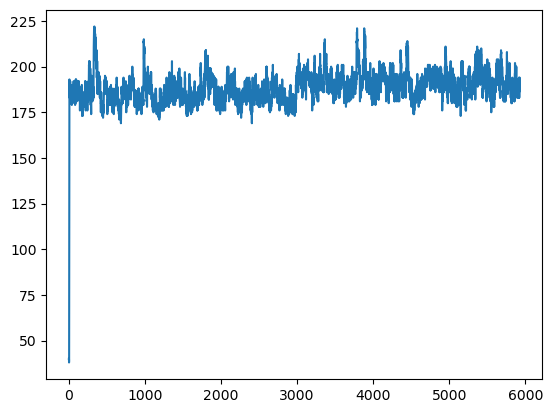

In [21]:
import matplotlib.pyplot as plt
plt.plot([np.max(im) for im in data])